In [3]:
import pandas as pd
from scipy.stats import pearsonr

path = "/Users/janellemarie/datasets/"

sales = pd.read_csv(path + "quarterly_sales.csv")
hm_sales = pd.read_csv(path + "hm_quarterly_sales_converted.csv")
hm_sales = hm_sales.rename(columns={"Net Sales (USD Millions)": "Net Sales ($ Millions)"})

combined = pd.concat([sales, hm_sales], ignore_index=True)
combined["Net Sales ($ Millions)"] = combined["Net Sales ($ Millions)"].astype(str).str.replace(",", "").astype(float)
combined["Brand"] = combined["Brand"].str.strip().replace("Gap Inc.", "Gap")

quarter_map = {"Q1": "01", "Q2": "04", "Q3": "07", "Q4": "10"}
combined["Month"] = combined["Fiscal Quarter"].map(quarter_map)
combined["Date"] = pd.to_datetime(combined["Year"].astype(str) + "-" + combined["Month"] + "-01")

monthly_sales = combined.groupby(["Date", "Brand"])["Net Sales ($ Millions)"].sum().reset_index()

files = [
    "abercrombie_search.csv",
    "americaneagle_search.csv",
    "coach_search.csv",
    "gap_search.csv",
    "hm_search.csv",
    "katespade_search.csv",
    "michaelkors_search.csv",
    "stuart_search.csv"
]

for file in files:
    brand_name = file.replace("_search.csv", "")
    if brand_name == "americaneagle":
        brand_name = "American Eagle"
    elif brand_name == "katespade":
        brand_name = "Kate Spade"
    elif brand_name == "michaelkors":
        brand_name = "Michael Kors"
    elif brand_name == "stuart":
        brand_name = "Stuart Weitzman"
    elif brand_name == "hm":
        brand_name = "H&M"
    else:
        brand_name = brand_name.capitalize()

    search = pd.read_csv(path + file)
    search["Date"] = pd.to_datetime(search["Date"])
    search["Search Interest"] = pd.to_numeric(search["Search Interest"], errors="coerce")
    search["Brand"] = brand_name

    merged = pd.merge(search, monthly_sales, on=["Date", "Brand"], how="inner")

    if len(merged) >= 2:
        corr, pval = pearsonr(merged["Search Interest"], merged["Net Sales ($ Millions)"])
        print(f"{brand_name}: Correlation = {round(corr, 3)} | P-Value = {round(pval, 4)}")


Abercrombie: Correlation = 0.476 | P-Value = 0.0006
American Eagle: Correlation = -0.619 | P-Value = 0.0
Coach: Correlation = -0.162 | P-Value = 0.2658
Gap: Correlation = 0.311 | P-Value = 0.0299
H&M: Correlation = 0.457 | P-Value = 0.001
Kate Spade: Correlation = -0.065 | P-Value = 0.6577
Michael Kors: Correlation = -0.046 | P-Value = 0.7548
Stuart Weitzman: Correlation = -0.11 | P-Value = 0.5359


In [31]:
import pandas as pd
from scipy.stats import pearsonr

path = "/Users/janellemarie/datasets/"

sales = pd.read_csv(path + "quarterly_sales.csv")
hm_sales = pd.read_csv(path + "hm_quarterly_sales_converted.csv")
hm_sales = hm_sales.rename(columns={"Net Sales (USD Millions)": "Net Sales ($ Millions)"})

combined = pd.concat([sales, hm_sales], ignore_index=True)
combined["Net Sales ($ Millions)"] = combined["Net Sales ($ Millions)"].astype(str).str.replace(",", "").astype(float)
combined["Brand"] = combined["Brand"].str.strip().replace("Gap Inc.", "Gap")

quarter_map = {"Q1": "01", "Q2": "04", "Q3": "07", "Q4": "10"}
combined["Month"] = combined["Fiscal Quarter"].map(quarter_map)
combined["Date"] = pd.to_datetime(combined["Year"].astype(str) + "-" + combined["Month"] + "-01")

combined.sort_values(by=["Brand", "Date"], inplace=True)
combined["Sales Change (%)"] = combined.groupby("Brand")["Net Sales ($ Millions)"].pct_change(fill_method=None) * 100

files = [
    "abercrombie_search.csv",
    "americaneagle_search.csv",
    "coach_search.csv",
    "gap_search.csv",
    "hm_search.csv",
    "katespade_search.csv",
    "michaelkors_search.csv",
    "stuart_search.csv"
]

for file in files:
    brand_name = file.replace("_search.csv", "")
    if brand_name == "americaneagle":
        brand_name = "American Eagle"
    elif brand_name == "katespade":
        brand_name = "Kate Spade"
    elif brand_name == "michaelkors":
        brand_name = "Michael Kors"
    elif brand_name == "stuart":
        brand_name = "Stuart Weitzman"
    elif brand_name == "hm":
        brand_name = "H&M"
    else:
        brand_name = brand_name.capitalize()

    search = pd.read_csv(path + file)
    search["Date"] = pd.to_datetime(search["Date"])
    search["Search Interest"] = pd.to_numeric(search["Search Interest"], errors="coerce")
    search["Brand"] = brand_name

    merged = pd.merge(search, combined, on=["Date", "Brand"], how="inner")
    merged = merged.dropna(subset=["Search Interest", "Sales Change (%)"])

    if len(merged) >= 2:
        corr, pval = pearsonr(merged["Search Interest"], merged["Sales Change (%)"])
        print(f"{brand_name}: Correlation = {round(corr, 3)} | P-Value = {round(pval, 4)}")
    else:
        print(f"{brand_name}: Not enough data for correlation.")


Abercrombie: Correlation = 0.15 | P-Value = 0.3101
American Eagle: Correlation = 0.135 | P-Value = 0.3599
Coach: Correlation = 0.201 | P-Value = 0.1228
Gap: Correlation = 0.171 | P-Value = 0.2458
H&M: Correlation = 0.166 | P-Value = 0.2604
Kate Spade: Correlation = -0.126 | P-Value = 0.4029
Michael Kors: Correlation = 0.036 | P-Value = 0.8062
Stuart Weitzman: Correlation = 0.137 | P-Value = 0.4619


In [8]:
!pip install seaborn

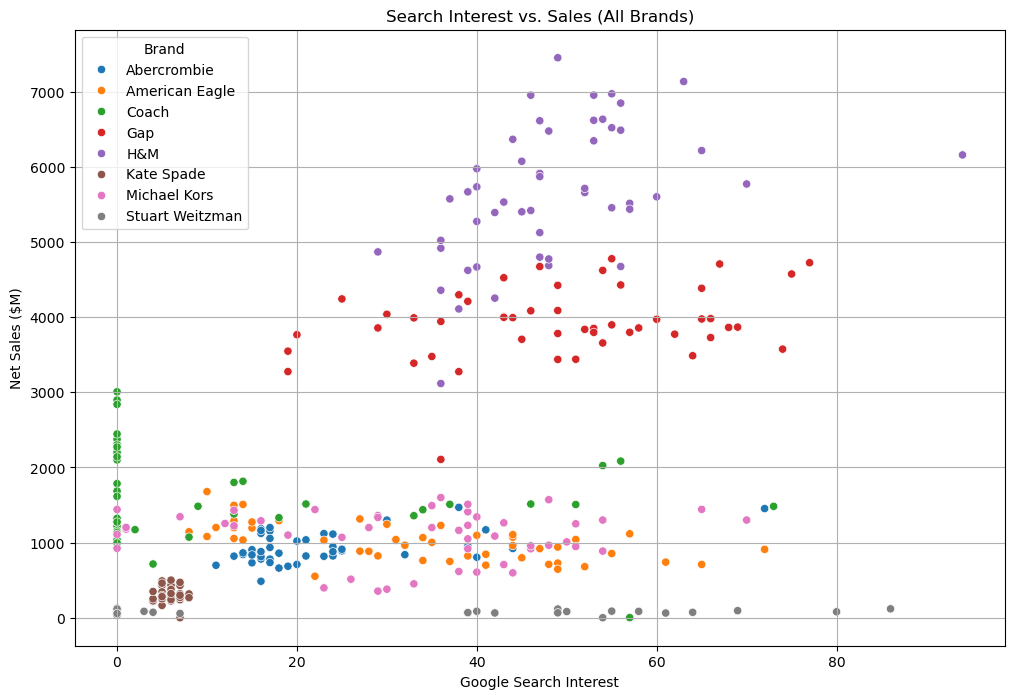

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

search_files = [
    "abercrombie_search.csv",
    "americaneagle_search.csv",
    "coach_search.csv",
    "gap_search.csv",
    "hm_search.csv",
    "katespade_search.csv",
    "michaelkors_search.csv",
    "stuart_search.csv"
]

search_data_cleaned = []

for file in search_files:
    brand_name = file.replace("_search.csv", "")
    if brand_name == "americaneagle":
        brand_name = "American Eagle"
    elif brand_name == "katespade":
        brand_name = "Kate Spade"
    elif brand_name == "michaelkors":
        brand_name = "Michael Kors"
    elif brand_name == "stuart":
        brand_name = "Stuart Weitzman"
    elif brand_name == "hm":
        brand_name = "H&M"
    else:
        brand_name = brand_name.capitalize()

    df = pd.read_csv(path + file)
    df["Date"] = pd.to_datetime(df["Date"])
    df["Search Interest"] = pd.to_numeric(df["Search Interest"], errors="coerce")
    df["Brand"] = brand_name
    search_data_cleaned.append(df)

all_search_data = pd.concat(search_data_cleaned, ignore_index=True)

search_sales = pd.merge(all_search_data, monthly_sales, on=["Date", "Brand"], how="inner")
search_sales = search_sales.dropna()

plt.figure(figsize=(12, 8))
sns.scatterplot(data=search_sales, x="Search Interest", y="Net Sales ($ Millions)", hue="Brand")
plt.title("Search Interest vs. Sales (All Brands)")
plt.xlabel("Google Search Interest")
plt.ylabel("Net Sales ($M)")
plt.grid(True)
plt.show()

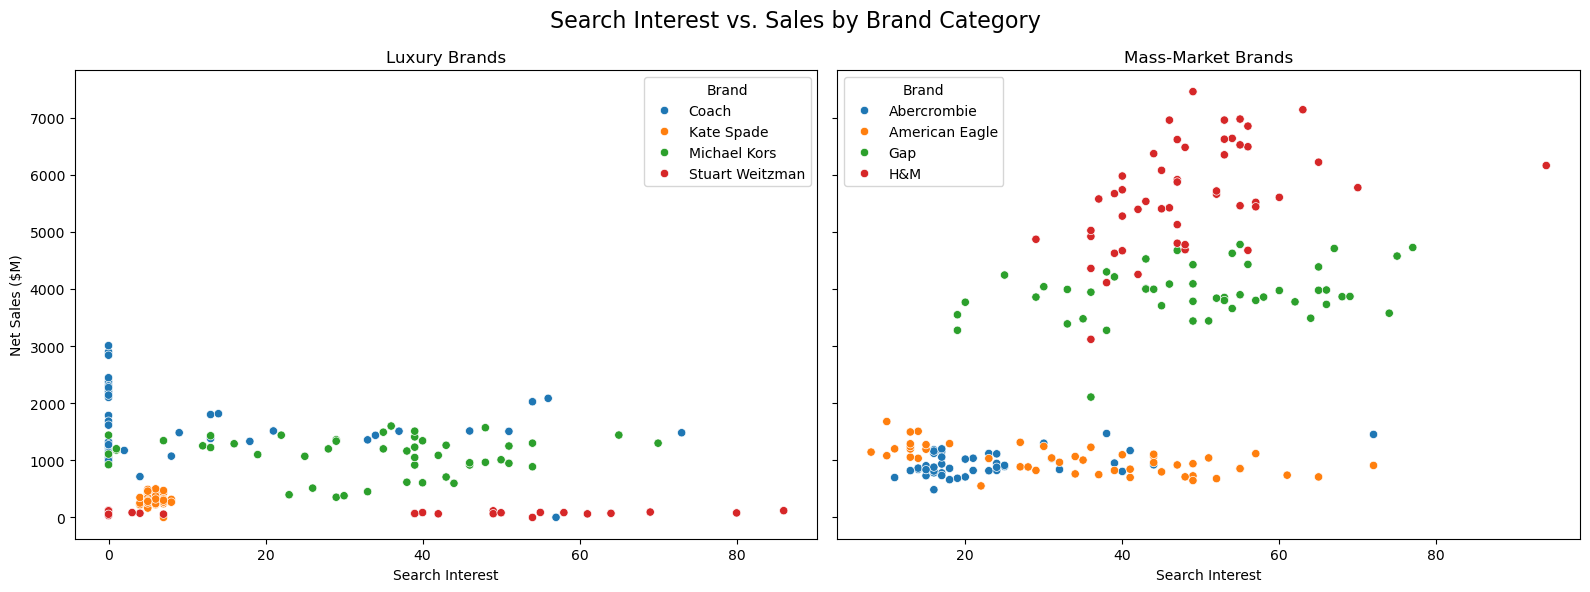

In [10]:
luxury_brands = ["Coach", "Kate Spade", "Stuart Weitzman", "Michael Kors"]
mass_market_brands = ["Abercrombie", "American Eagle", "Gap", "H&M"]

search_sales = pd.merge(all_search_data, monthly_sales, on=["Date", "Brand"], how="inner")
search_sales = search_sales.dropna()
search_sales["Brand Type"] = search_sales["Brand"].apply(lambda x: "Luxury" if x in luxury_brands else "Mass-Market")

luxury = search_sales[search_sales["Brand Type"] == "Luxury"]
mass = search_sales[search_sales["Brand Type"] == "Mass-Market"]

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

sns.scatterplot(data=luxury, x="Search Interest", y="Net Sales ($ Millions)", hue="Brand", ax=axes[0])
axes[0].set_title("Luxury Brands")
axes[0].set_xlabel("Search Interest")
axes[0].set_ylabel("Net Sales ($M)")

sns.scatterplot(data=mass, x="Search Interest", y="Net Sales ($ Millions)", hue="Brand", ax=axes[1])
axes[1].set_title("Mass-Market Brands")
axes[1].set_xlabel("Search Interest")
axes[1].set_ylabel("")

plt.suptitle("Search Interest vs. Sales by Brand Category", fontsize=16)
plt.tight_layout()
plt.show()

will just still to correlations bc this looks insane

In [13]:
pip install textblob

  Using cached textblob-0.19.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
Using cached textblob-0.19.0-py3-none-any.whl (624 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install praw

Note: you may need to restart the kernel to use updated packages.


In [17]:
import praw

reddit = praw.Reddit(
    client_id="8DsIW4DAuPnHNFSqaFj98A",
    client_secret="FkL4hqDJc81s5JSo02eoB65eqDCWsw",
    user_agent="CapstoneSentimentApp by janellemariie"
)

for post in reddit.subreddit("femalefashionadvice").search("coach bag", limit=5):
    print(post.title)

Where do Coach sit in the tier of nice bags these days?
“The Logic of Stupid Poor People”-how have you used fashion to navigate classism/racism?
I spent a month planning a capsule wardobe for a 2 week trip in Asia that I gave up on after 4 days. Album included!
Your guide to shopping The RealReal — a hot mess consignment website with some amazing gems.
Found a (very worn) “Coach” bag at the thrift store. Assuming it’s fake, but curious how to tell?


In [20]:
from datetime import datetime

def get_brand_sentiment(brand_keyword, subreddit="femalefashionadvice", year=2021, quarters=["Q1", "Q2"]):
    result = []
    quarter_dates = {
        "Q1": ("01-01", "03-31"),
        "Q2": ("04-01", "06-30"),
        "Q3": ("07-01", "09-30"),
        "Q4": ("10-01", "12-31"),
    }

    for q in quarters:
        after = f"{year}-{quarter_dates[q][0]}"
        before = f"{year}-{quarter_dates[q][1]}"
        after_ts = int(datetime.strptime(after, "%Y-%m-%d").timestamp())
        before_ts = int(datetime.strptime(before, "%Y-%m-%d").timestamp())

        posts = reddit.subreddit(subreddit).search(brand_keyword, sort="new", limit=100)
        sentiments = []

        for post in posts:
            if after_ts <= post.created_utc <= before_ts:
                text = post.title + " " + (post.selftext or "")
                score = TextBlob(text).sentiment.polarity
                sentiments.append(score)

        avg_sentiment = sum(sentiments)/len(sentiments) if sentiments else 0
        result.append({
            "Brand": brand_keyword,
            "Quarter": f"{year} {q}",
            "Num Posts": len(sentiments),
            "Avg Sentiment": round(avg_sentiment, 3)
        })

    return pd.DataFrame(result)

In [21]:
coach_df = get_brand_sentiment("coach bag", year=2021, quarters=["Q1", "Q2", "Q3", "Q4"])
coach_df

,Brand,Quarter,Num Posts,Avg Sentiment
0,coach bag,2021 Q1,0,0.000
1,coach bag,2021 Q2,0,0.000
2,coach bag,2021 Q3,2,0.134
3,coach bag,2021 Q4,5,0.223


In [26]:
def get_brand_sentiment_yearly(brand_keyword, subreddit="femalefashionadvice", start_year=2012, end_year=2024):
    results = []
    for year in range(start_year, end_year + 1):
        after = int(datetime(year, 1, 1).timestamp())
        before = int(datetime(year, 12, 31).timestamp())

        sentiments = []
        post_count = 0

        for post in reddit.subreddit(subreddit).search(brand_keyword, sort="new", limit=1000):
            if after <= post.created_utc <= before:
                text = post.title + " " + (post.selftext or "")
                score = TextBlob(text).sentiment.polarity
                sentiments.append(score)
                post_count += 1

        avg_sentiment = sum(sentiments) / len(sentiments) if sentiments else 0
        results.append({
            "Brand": brand_keyword,
            "Year": year,
            "Num Posts": post_count,
            "Avg Sentiment": round(avg_sentiment, 3)
        })

    return pd.DataFrame(results)

# Your 8 brand search terms
brand_keywords = {
    "Abercrombie": "abercrombie",
    "American Eagle": "american eagle",
    "Coach": "coach bag",
    "Gap": "gap",
    "H&M": "h&m",
    "Kate Spade": "kate spade",
    "Michael Kors": "michael kors",
    "Stuart Weitzman": "stuart weitzman"
}

all_brand_sentiment = pd.concat([
    get_brand_sentiment_yearly(keyword).assign(Brand=brand)
    for brand, keyword in brand_keywords.items()
], ignore_index=True)

all_brand_sentiment.to_csv("reddit_sentiment_by_year.csv", index=False)

In [ ]:
def get_reddit_sentiment_pushshift(keyword, subreddit, start_year=2012, end_year=2024):
    results = []
    for year in range(start_year, end_year + 1):
        after = int(datetime(year, 1, 1).timestamp())
        before = int(datetime(year + 1, 1, 1).timestamp())

        url = f"https://api.pushshift.io/reddit/search/submission/?q={keyword}&subreddit={subreddit}&after={after}&before={before}&size=500"
        response = requests.get(url)
        data = response.json().get("data", [])

        sentiments = []
        for post in data:
            text = post.get("title", "") + " " + post.get("selftext", "")
            score = TextBlob(text).sentiment.polarity
            sentiments.append(score)

        avg_sentiment = sum(sentiments) / len(sentiments) if sentiments else 0
        results.append({
            "Keyword": keyword,
            "Subreddit": subreddit,
            "Year": year,
            "Num Posts": len(sentiments),
            "Avg Sentiment": round(avg_sentiment, 3)
        })

        time.sleep(1.5)
    return pd.DataFrame(results)

brand_subreddits = {
    "Abercrombie": ("abercrombie", "malefashionadvice"),
    "American Eagle": ("american eagle", "malefashionadvice"),
    "Coach": ("coach", "Coach"),
    "Gap": ("gap", "malefashionadvice"),
    "H&M": ("h&m", "malefashionadvice"),
    "Kate Spade": ("kate spade", "femalefashionadvice"),
    "Michael Kors": ("michael kors", "michaelkors"),
    "Stuart Weitzman": ("stuart weitzman", "femalefashionadvice")
}

all_sentiments = pd.concat([
    get_reddit_sentiment_pushshift(keyword=kw, subreddit=sub)
    .assign(Brand=brand)
    for brand, (kw, sub) in brand_subreddits.items()
], ignore_index=True)

all_sentiments.to_csv("reddit_sentiment_by_subreddit.csv", index=False)

In [29]:
yearly_sales = combined.groupby(["Year", "Brand"])["Net Sales ($ Millions)"].sum().reset_index()
yearly_sales["Sales Change (%)"] = yearly_sales.groupby("Brand")["Net Sales ($ Millions)"].pct_change() * 100

sentiment = pd.read_csv(path + "femalefashionadvice.csv")

merged = pd.merge(sentiment, yearly_sales, on=["Year", "Brand"], how="inner").dropna()

brands = merged["Brand"].unique()
for brand in brands:
    df = merged[merged["Brand"] == brand]
    if len(df) >= 2:
        corr, pval = pearsonr(df["Avg Sentiment"], df["Sales Change (%)"])
        print(f"{brand}: Correlation = {round(corr, 3)} | P-Value = {round(pval, 4)}")

Abercrombie: Correlation = 0.082 | P-Value = 0.8343
American Eagle: Correlation = -0.068 | P-Value = 0.8618
Coach: Correlation = 0.223 | P-Value = 0.5639
Gap: Correlation = 0.102 | P-Value = 0.7944
H&M: Correlation = -0.881 | P-Value = 0.0017
Kate Spade: Correlation = -0.261 | P-Value = 0.498
Michael Kors: Correlation = 0.214 | P-Value = 0.5808
Stuart Weitzman: Correlation = 0.069 | P-Value = 0.861


In [32]:
def get_brand_sentiment_by_year(subreddit_name, brand, years=range(2016, 2024)):
    results = []
    for year in years:
        start = int(datetime(year, 1, 1).timestamp())
        end = int(datetime(year + 1, 1, 1).timestamp())
        try:
            posts = reddit.subreddit(subreddit_name).search(brand, sort="new", limit=300, params={"after": start, "before": end})
            texts = [post.title + " " + post.selftext for post in posts if hasattr(post, "selftext")]
            sentiments = [TextBlob(text).sentiment.polarity for text in texts]
            avg_sentiment = sum(sentiments) / len(sentiments) if sentiments else 0
            results.append({
                "Brand": brand,
                "Year": year,
                "Num Posts": len(sentiments),
                "Avg Sentiment": avg_sentiment
            })
        except Exception as e:
            print(f"Error pulling {brand} in r/{subreddit_name} for {year}: {e}")
            results.append({
                "Brand": brand,
                "Year": year,
                "Num Posts": 0,
                "Avg Sentiment": 0
            })
    return results

all_sentiment_data = []
for brand, subreddit in brand_subreddits.items():
    brand_data = get_brand_sentiment_by_year(subreddit, brand)
    all_sentiment_data.extend(brand_data)

sentiment_df = pd.DataFrame(all_sentiment_data)

sentiment_df.to_csv("/Users/janellemarie/datasets/reddit_sentiment_by_year.csv", index=False)

print(sentiment_df.head())

Error pulling Abercrombie in r/('abercrombie', 'malefashionadvice') for 2016: 'tuple' object has no attribute 'lower'
Error pulling Abercrombie in r/('abercrombie', 'malefashionadvice') for 2017: 'tuple' object has no attribute 'lower'
Error pulling Abercrombie in r/('abercrombie', 'malefashionadvice') for 2018: 'tuple' object has no attribute 'lower'
Error pulling Abercrombie in r/('abercrombie', 'malefashionadvice') for 2019: 'tuple' object has no attribute 'lower'
Error pulling Abercrombie in r/('abercrombie', 'malefashionadvice') for 2020: 'tuple' object has no attribute 'lower'
Error pulling Abercrombie in r/('abercrombie', 'malefashionadvice') for 2021: 'tuple' object has no attribute 'lower'
Error pulling Abercrombie in r/('abercrombie', 'malefashionadvice') for 2022: 'tuple' object has no attribute 'lower'
Error pulling Abercrombie in r/('abercrombie', 'malefashionadvice') for 2023: 'tuple' object has no attribute 'lower'
Error pulling American Eagle in r/('american eagle', 'ma

In [33]:
yearly_sales = combined.groupby(["Year", "Brand"])["Net Sales ($ Millions)"].sum().reset_index()
yearly_sales["Sales Change (%)"] = yearly_sales.groupby("Brand")["Net Sales ($ Millions)"].pct_change() * 100

sentiment = pd.read_csv(path + "reddit_sentiment_by_year.csv")

merged = pd.merge(sentiment, yearly_sales, on=["Year", "Brand"], how="inner").dropna()

brands = merged["Brand"].unique()
for brand in brands:
    df = merged[merged["Brand"] == brand]
    if len(df) >= 2:
        corr, pval = pearsonr(df["Avg Sentiment"], df["Sales Change (%)"])
        print(f"{brand}: Correlation = {round(corr, 3)} | P-Value = {round(pval, 4)}")

Abercrombie: Correlation = 0.183 | P-Value = 0.5695
American Eagle: Correlation = -0.031 | P-Value = 0.9249
Coach: Correlation = 0.16 | P-Value = 0.6186
Gap: Correlation = 0.089 | P-Value = 0.7825
H&M: Correlation = -0.696 | P-Value = 0.0119
Kate Spade: Correlation = -0.213 | P-Value = 0.5059
Michael Kors: Correlation = 0.338 | P-Value = 0.2823
Stuart Weitzman: Correlation = 0.069 | P-Value = 0.861


In [39]:
yearly_sales = combined.groupby(["Year", "Brand"])["Net Sales ($ Millions)"].sum().reset_index()
yearly_sales["Sales Change (%)"] = yearly_sales.groupby("Brand")["Net Sales ($ Millions)"].pct_change() * 100

sentiment = pd.read_csv(path + "reddit_sentiment_by_year.csv")

merged = pd.merge(sentiment, yearly_sales, on=["Year", "Brand"], how="inner").dropna()

election_years = [2016, 2020, 2024]
filtered = merged[merged["Year"].isin(election_years)]

results = []

for brand in filtered["Brand"].unique():
    df = filtered[filtered["Brand"] == brand]
    if len(df) >= 2:
        corr, pval = pearsonr(df["Avg Sentiment"], df["Sales Change (%)"])
        results.append({
            "Brand": brand,
            "Correlation": round(corr, 3),
            "P-Value": round(pval, 4),
            "Years Analyzed": len(df)
        })

results_df = pd.DataFrame(results)
results_df.to_csv(path + "reddit_correlation_election_years.csv", index=False)
print(results_df)

             Brand  Correlation  P-Value  Years Analyzed
0      Abercrombie        0.696   0.5099               3
1   American Eagle       -0.079   0.9496               3
2            Coach       -0.913   0.2673               3
3              Gap        0.430   0.7172               3
4              H&M       -0.942   0.2184               3
5       Kate Spade        0.148   0.9052               3
6     Michael Kors        0.791   0.4191               3
7  Stuart Weitzman        0.794   0.4159               3
